In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame, Series

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

%matplotlib inline

In [4]:
# Importing the dataset
df = pd.read_csv("../../archive/Mall_Customers.csv")

In [5]:
# Quick look on the dataset
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


- The mall collects info on the customers who get this card. Spending Score is based on their income, the frequency the visit the mall, and the amount spend in the mall. Closer to 100, the more the client spends.
- You have to segment the customers based on the income and the spending score (lets say if we use more variables)

In [13]:
# Storing the XValues
Xs = df.loc[:, ['Spending Score (1-100)', 'Annual Income (k$)']]
Xs_vals = df.loc[:, ['Spending Score (1-100)', 'Annual Income (k$)']].values
Xs.head()

,Spending Score (1-100),Annual Income (k$)
0,39,15
1,81,15
2,6,16
3,77,16
4,40,17


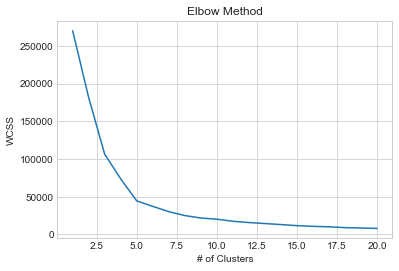

In [20]:
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans

wcss = [] # storing the within clusters sum of squares

for i in range(1,21):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=20, random_state=0)
    kmeans.fit(Xs)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,21), wcss)
plt.title('Elbow Method')
plt.xlabel('# of Clusters')
plt.ylabel('WCSS')
plt.show()

- The optimal number of clusters is **5**

In [21]:
# Using 5 as our number of clusters
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=20, random_state=0)

# Predicting the cluster our observations would fit into
y_kmeans = kmeans.fit_predict(Xs)

In [22]:
# The cluster each of our observations are apart of
y_kmeans

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1, 4, 3,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2], dtype=int32)

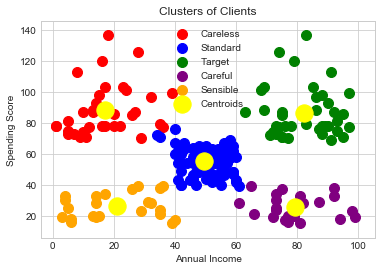

In [46]:
# Visualizing the clusters
plt.scatter(Xs.iloc[y_kmeans==0, 0], Xs.iloc[y_kmeans==0, 1], s=100, c='red', label='Careless')
plt.scatter(Xs.iloc[y_kmeans==1, 0], Xs.iloc[y_kmeans==1, 1], s=100, c='blue', label='Standard')
plt.scatter(Xs.iloc[y_kmeans==2, 0], Xs.iloc[y_kmeans==2, 1], s=100, c='green', label='Target')
plt.scatter(Xs.iloc[y_kmeans==3, 0], Xs.iloc[y_kmeans==3, 1], s=100, c='purple', label='Careful')
plt.scatter(Xs.iloc[y_kmeans==4, 0], Xs.iloc[y_kmeans==4, 1], s=100, c='orange', label='Sensible')

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=300, c='yellow', label='Centroids')

plt.title('Clusters of Clients')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')

plt.legend()
plt.show()